In [1]:
import PyWGCNA
import numpy as np
import pandas as pd
import scanpy as sc

from gprofiler import GProfiler
from gprofiler_plotting import plot_enrich, plot_gene_enrichment

In [2]:
DATA_DIR = ""
FILE_NAME = ""

In [3]:
adata = sc.read(f"{DATA_DIR}/{FILE_NAME}")

In [4]:
adata

AnnData object with n_obs × n_vars = 60 × 4172
    obs: 'condition', 'region', 'sample', 'condition_region', 'condition_region_sample'
    var: 'gene', 'protein_id', 'n_cells'

In [5]:
adata = adata[np.argsort(adata.obs["region"].values), :]
adata.obs_names = np.arange(len(adata))

In [7]:
expr = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs["condition_region_sample"])

In [ ]:
pyWGCNA_mouse = PyWGCNA.WGCNA(name='mouse', 
                              species='mus musculus', 
                              geneExp=expr, 
                              RsquaredCut=0.8,
                              MEDissThres=0.15,
                              save=True)

#### Pre-processing workflow


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



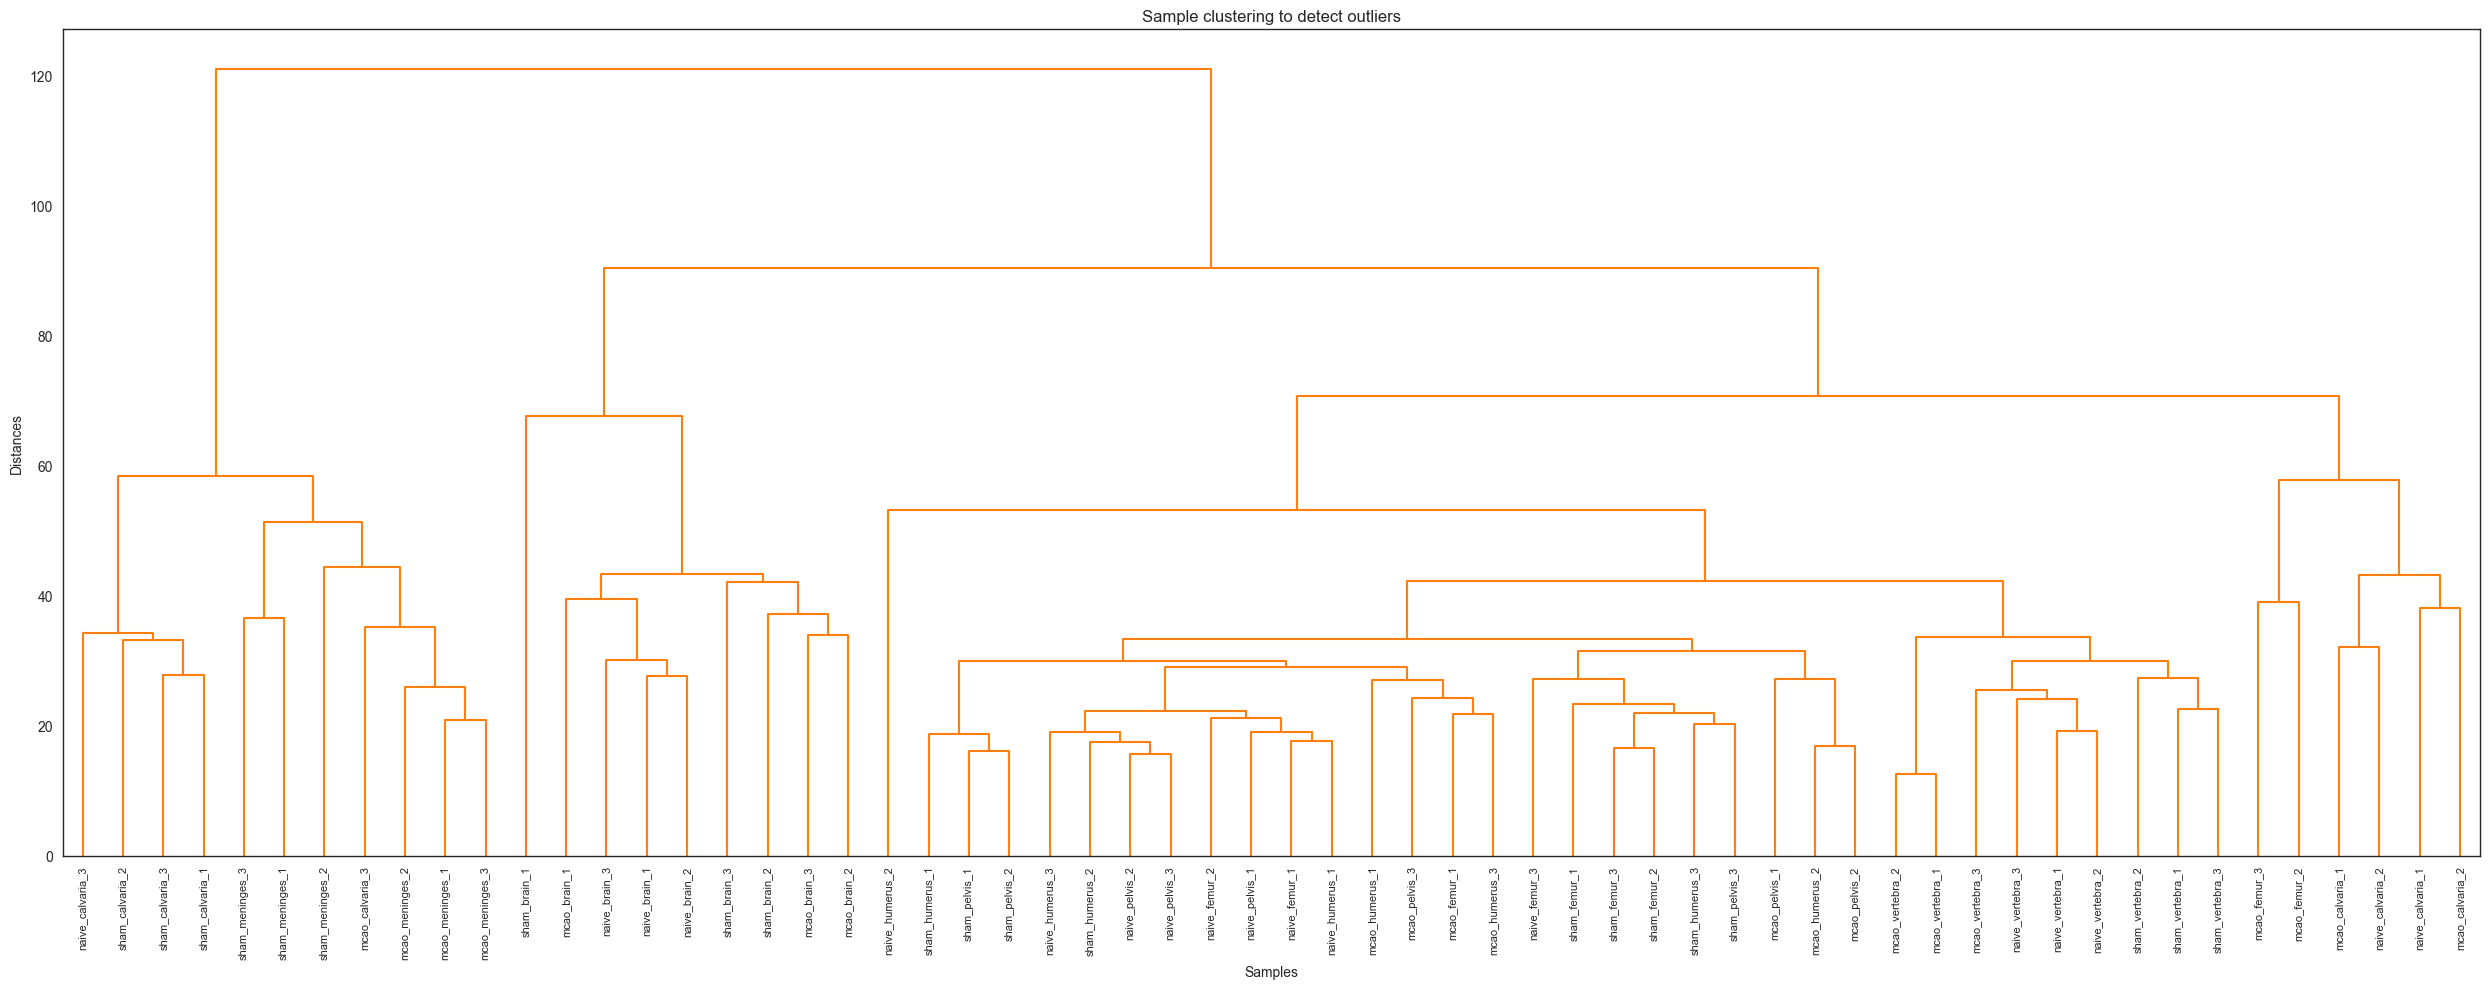

In [9]:
pyWGCNA_mouse.preprocess()


#### Construction of the gene network and identification of modules
PyWGCNA compresses all the steps of network construction and module detection in one function called findModules which performs the following steps:

1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  4172
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.366611  0.892812       0.973887  2501.873453  2689.285511   
1       2   0.37368  0.627521       0.800577  1796.578448  1943.513497   
2       3  0.364463  0.450208       0.517518  1355.872881  1468.584238   
3       4  0.251924   0.29871       0.110986  1055.902483  1134.046661   
4       5  0.102894  0.167583      -0.140062   841.018949   892.230568   
5       6  0.003821  0.035628      -0.094629   681.576756   717.310815   
6       7  0.014403 -0.074725       0.092726   560.127231   585.371408   
7       8  0.071222 -0.181417       0.276636   465.691835   482.691469   
8       9   0.14601 -0.288136       0.424781   391.020078   400.603314   
9      10  0.214219 -0.386444       0.523131   331.142357    334.76762   
10     11  0.270488 -0.467515       0.608513   282.550082   282.867117   
11     13

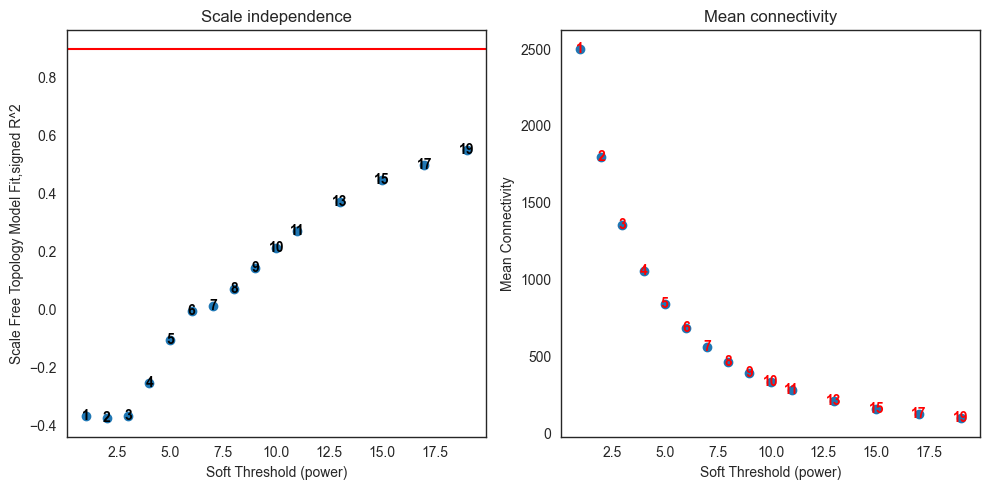

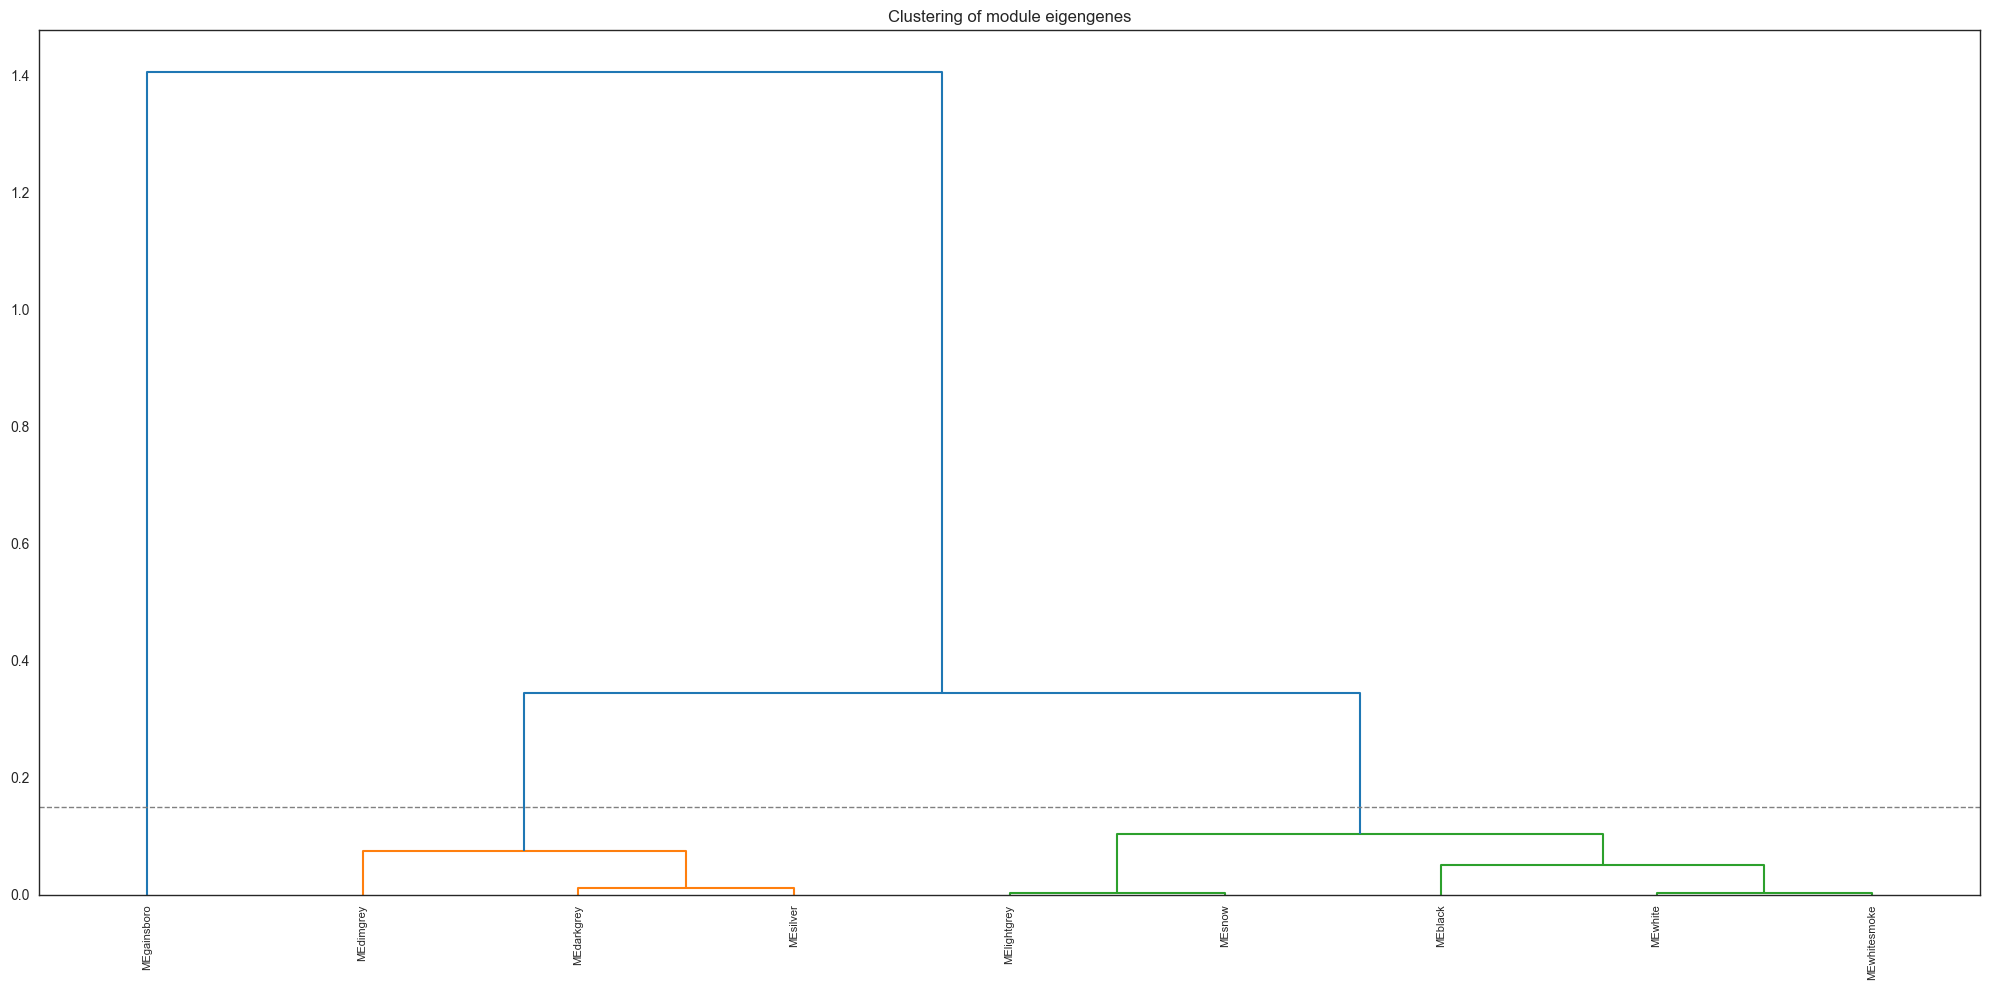

In [10]:
pyWGCNA_mouse.findModules()

### Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in analyseWGCNA() function including:

1. Quantifying module–trait relationship
2. Gene relationship to trait and modules
3. Gene-ontology analysis
4. Keep in your mind before you start analysis to add any sample or gene information.

For showing module relationship heatmap, PyWGCNA needs user to choose and set colors from Matplotlib colors for metadata by using setMetadataColor() function.

You also can select which data trait in which order you wish to show in module eigengene heatmap

In [12]:
samples_info = adata.obs
samples_info.index = adata.obs["condition_region_sample"].values
samples_info.head()
samples_info = samples_info[["region", "condition"]]
samples_info.head()

,region,condition
mcao_brain_3,brain,mcao
naive_brain_1,brain,naive
sham_brain_3,brain,sham
mcao_brain_2,brain,mcao
naive_brain_3,brain,naive


In [13]:
region_to_color = {
    "Calvaria"  : "#e377c2",
    "Brain"     : "#1f77b4",
    "Femur"     : "#ff7f0e",
    "Humerus"   : "#279e68",
    "Meninges"  : "#d62728",
    "Pelvis"    : "#aa40fc",
    "Scapula"   : "#8c564b",
    "Vertebra"  : "#b5bd61",
}

condition_to_color = {
    'MCAo'      : "#1f77b4",
    'Naive'     : "#ff7f0e",
    'Sham'      : "#279e68",
}

In [14]:
pyWGCNA_mouse.updateSampleInfo(sampleInfo=samples_info)

# add color for metadata
pyWGCNA_mouse.setMetadataColor('region', {'brain': region_to_color["Brain"],
                                          'meninges': region_to_color["Meninges"],
                                          'calvaria': region_to_color["Calvaria"],
                                          'vertebra': region_to_color["Vertebra"],
                                          'pelvis': region_to_color["Pelvis"],
                                          'femur': region_to_color["Femur"],
                                          'humerus': region_to_color["Humerus"],

                                         })
pyWGCNA_mouse.setMetadataColor('condition', {'naive': condition_to_color["Naive"],
                                             'sham': condition_to_color["Sham"],
                                             'mcao': condition_to_color["MCAo"],
                                            })

#pyWGCNA_mouse.datExpr = pyWGCNA_mouse.datExpr[np.argsort(pyWGCNA_mouse.datExpr.obs["region"].values.to_list()), :]
geneList = adata.var
geneList


,gene,protein_id,n_cells
Ighd,Ighd,A0A0A6YW14,42
Igha,Igha,P01878,43
Gm20807,Gm20807,A0A0A6YXX7,47
Nup205,Nup205,A0A0J9YUD5,58
Lcmt1,Lcmt1,A0A0U1RNF2,52
...,...,...,...
Plpbp,Plpbp,Q9Z2Y8,57
Slc25a20,Slc25a20,Q9Z2Z6,58
Sart1,Sart1,Q9Z315,54
Mroh6,Mroh6,V9GX81,60


Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

Updating gene information based on given gene list ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
	gene name didn't found in gene information!
	 Go term analysis can not be done
	Done..



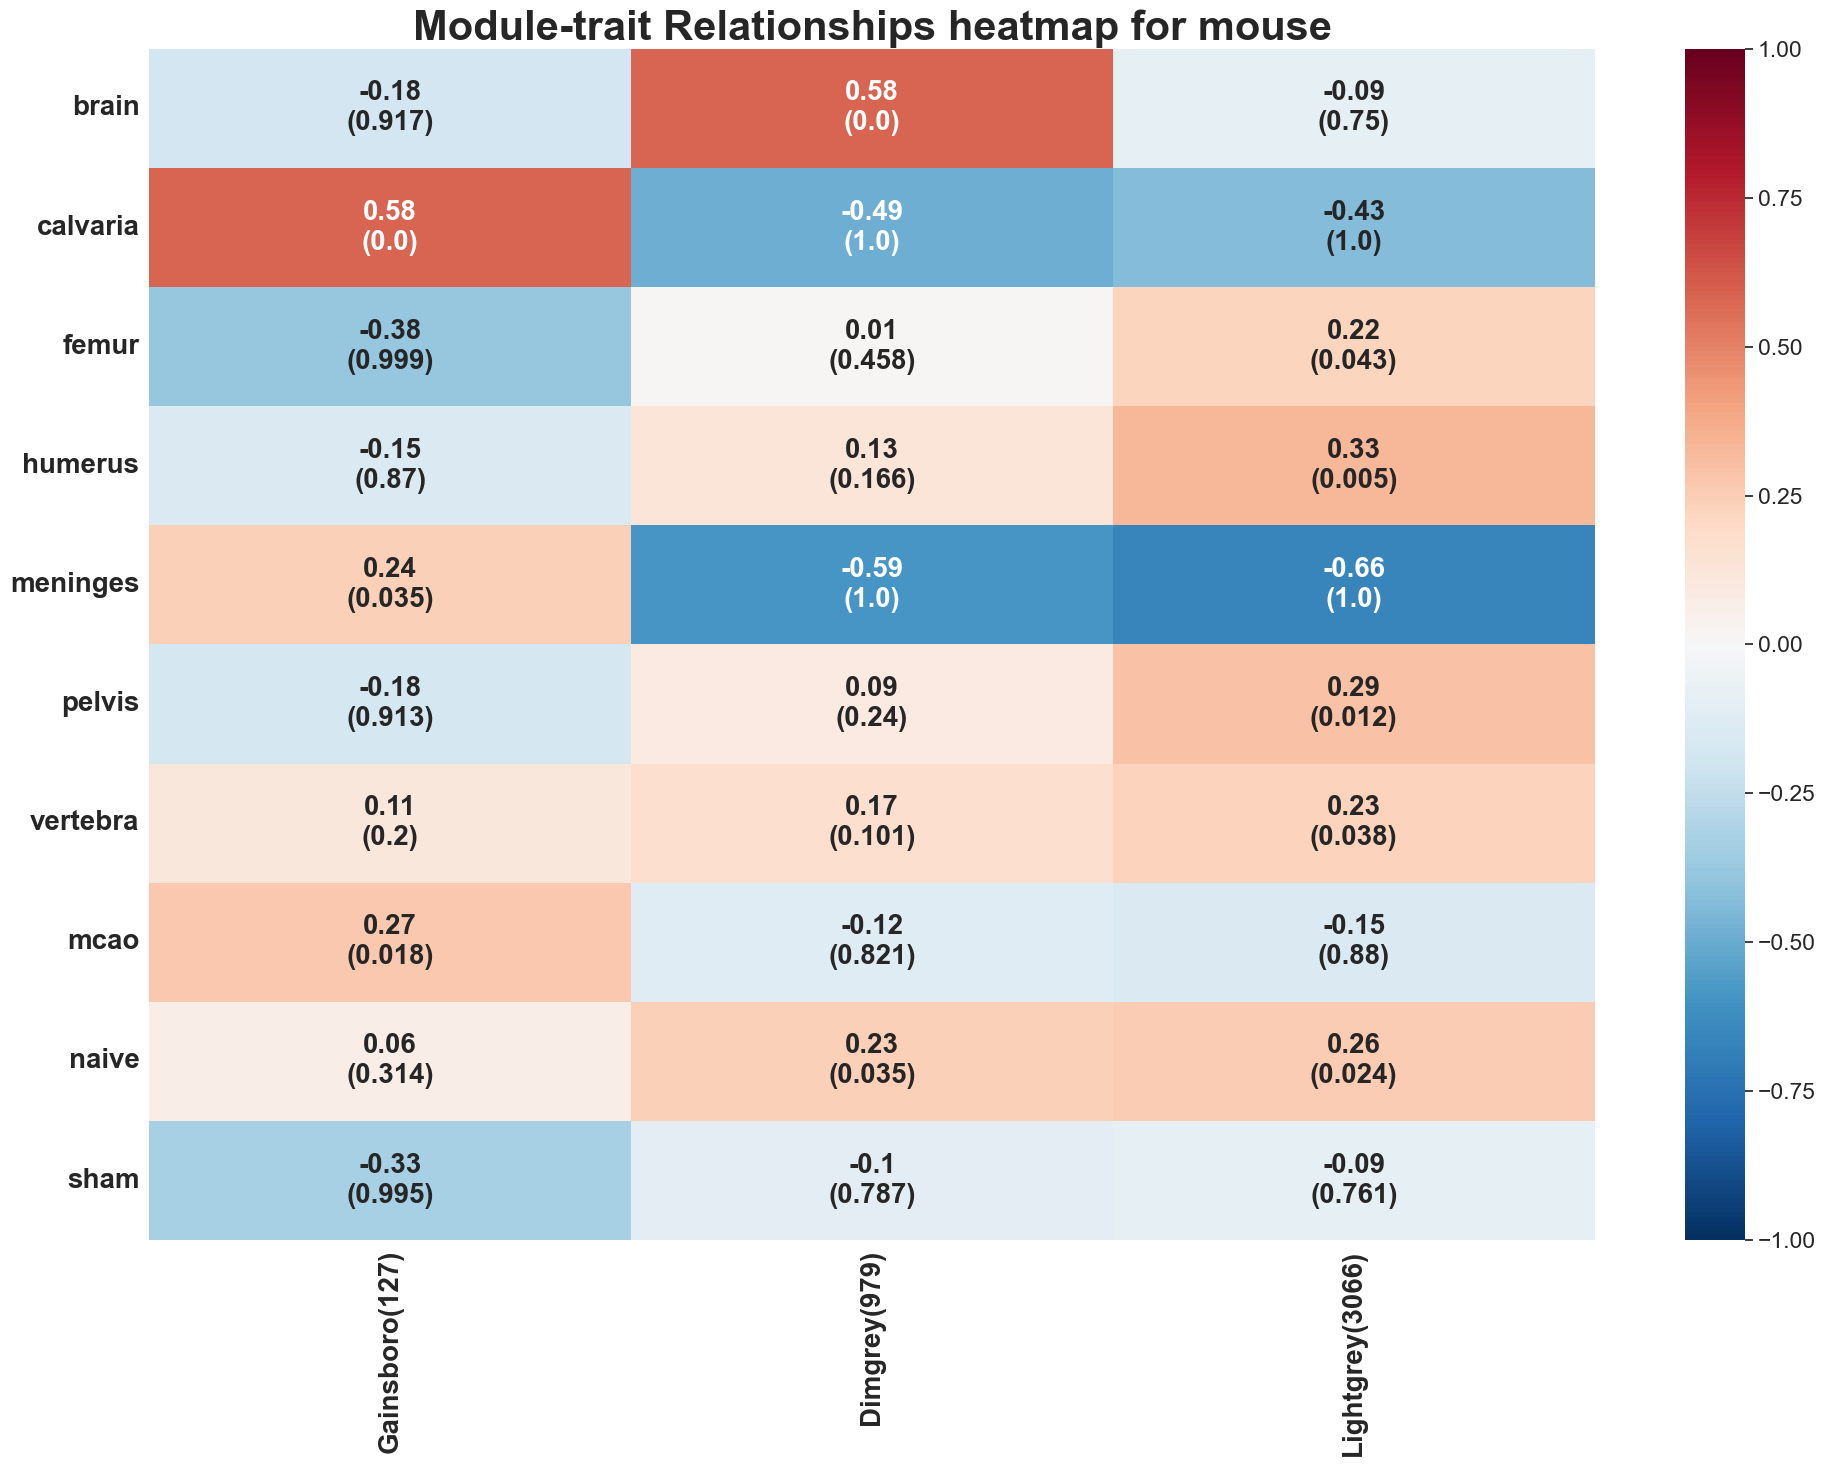

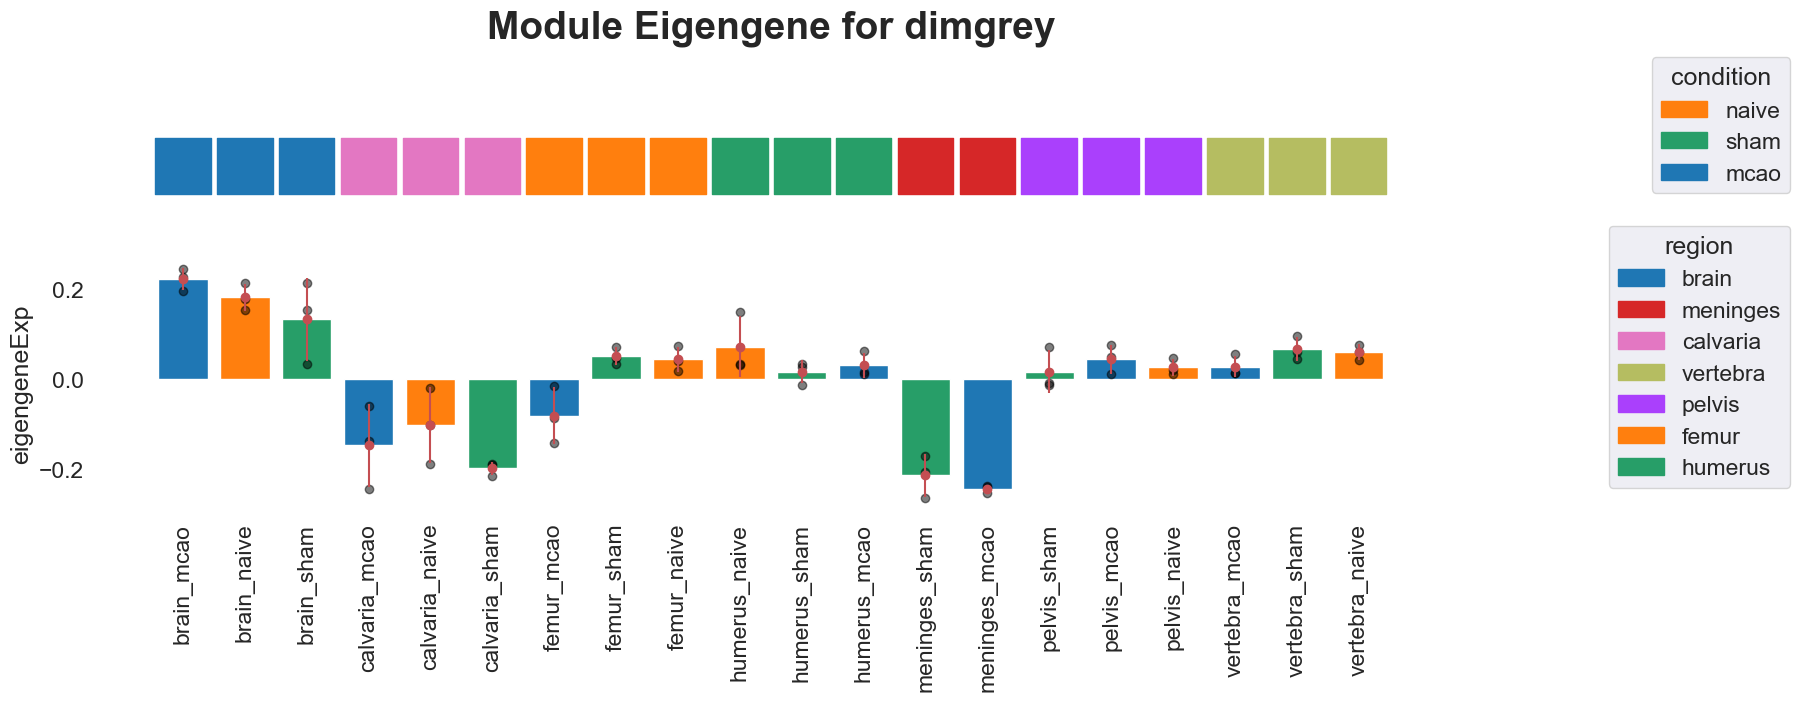

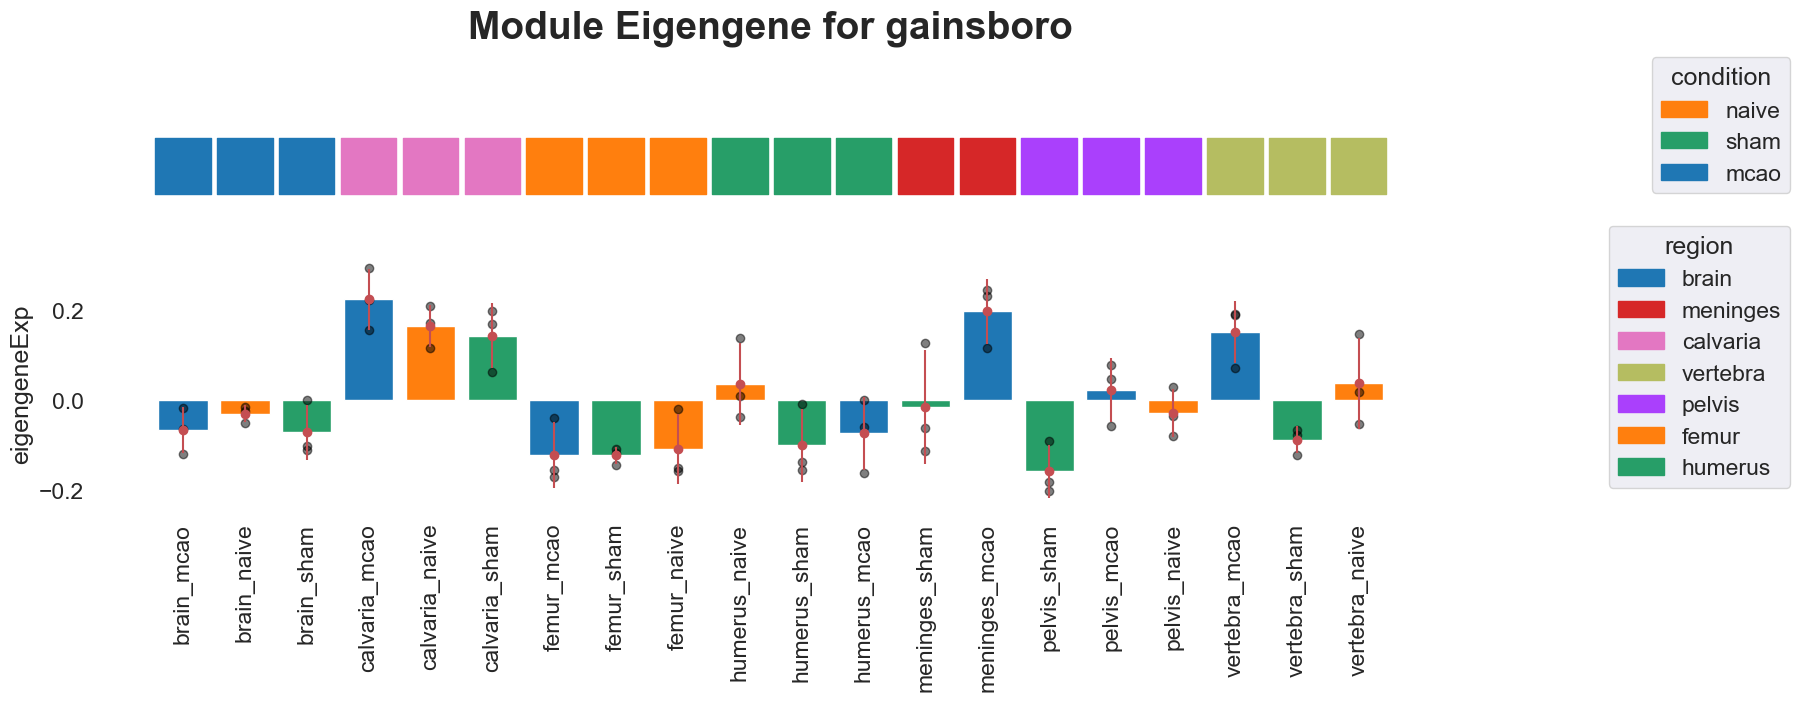

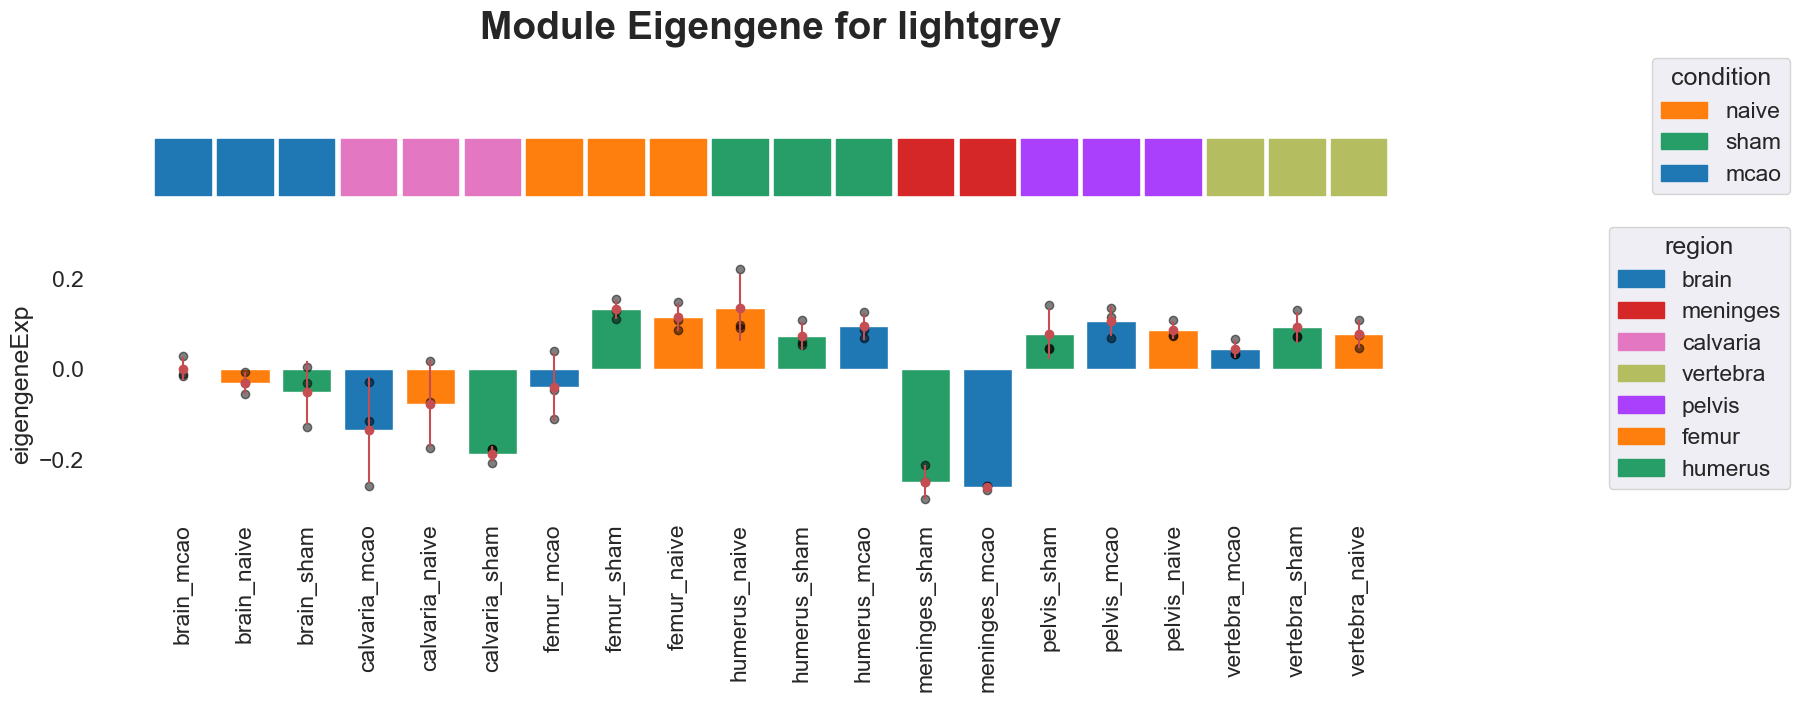

In [15]:
pyWGCNA_mouse.analyseWGCNA(geneList=geneList)

In [16]:
pyWGCNA_mouse.saveWGCNA()

Saving WGCNA as mouse.p


In [17]:
pyWGCNA_mouse = PyWGCNA.readWGCNA("mouse.p")

Reading mouse WGCNA done!


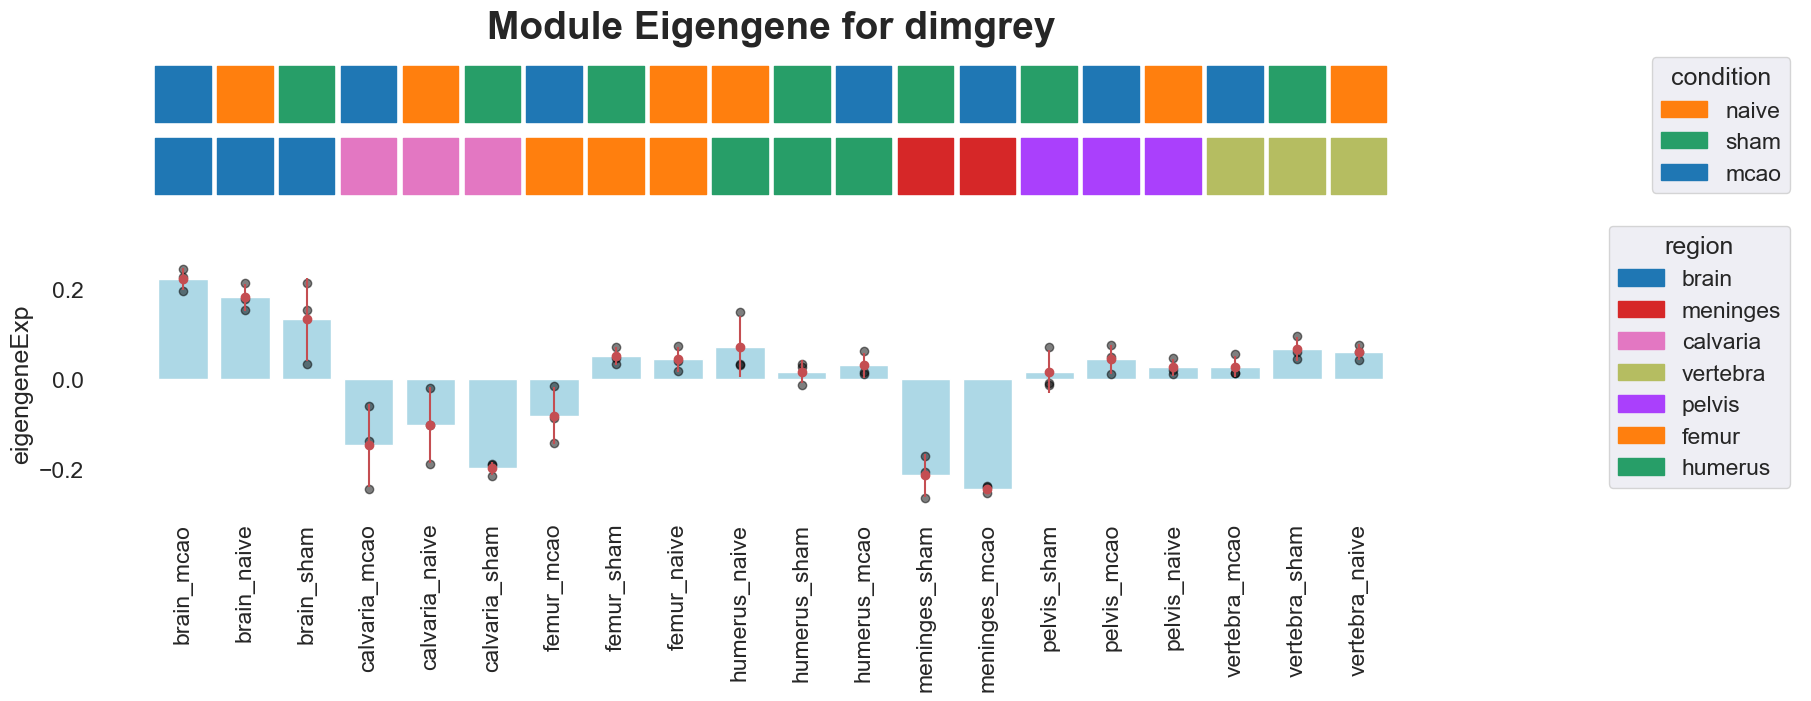

In [18]:
pyWGCNA_mouse.barplotModuleEigenGene(moduleName="dimgrey", metadata=samples_info.columns.tolist())

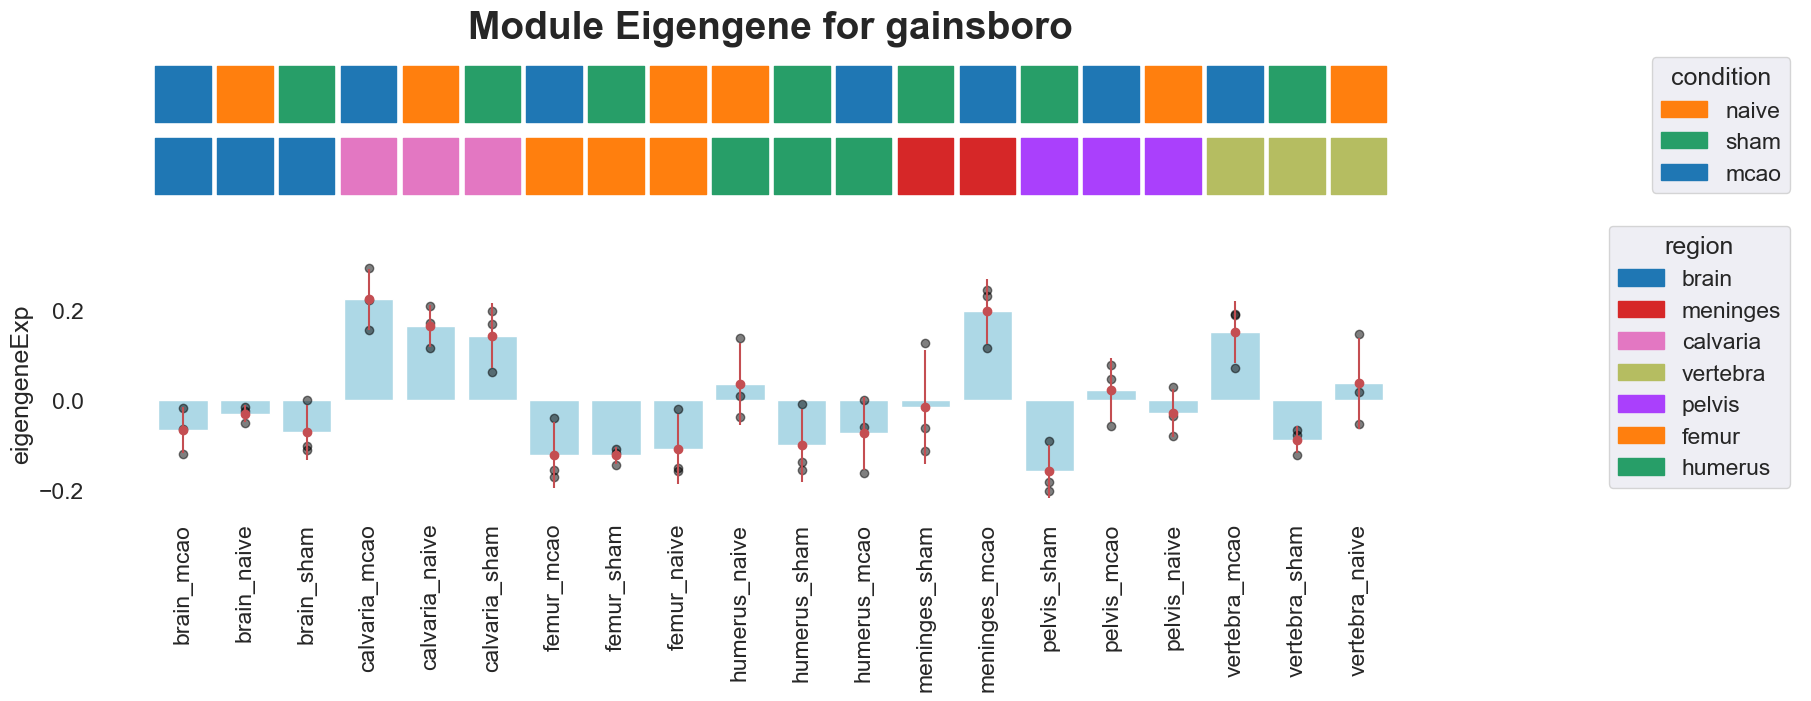

In [19]:
pyWGCNA_mouse.barplotModuleEigenGene(moduleName="gainsboro", metadata=samples_info.columns.tolist())

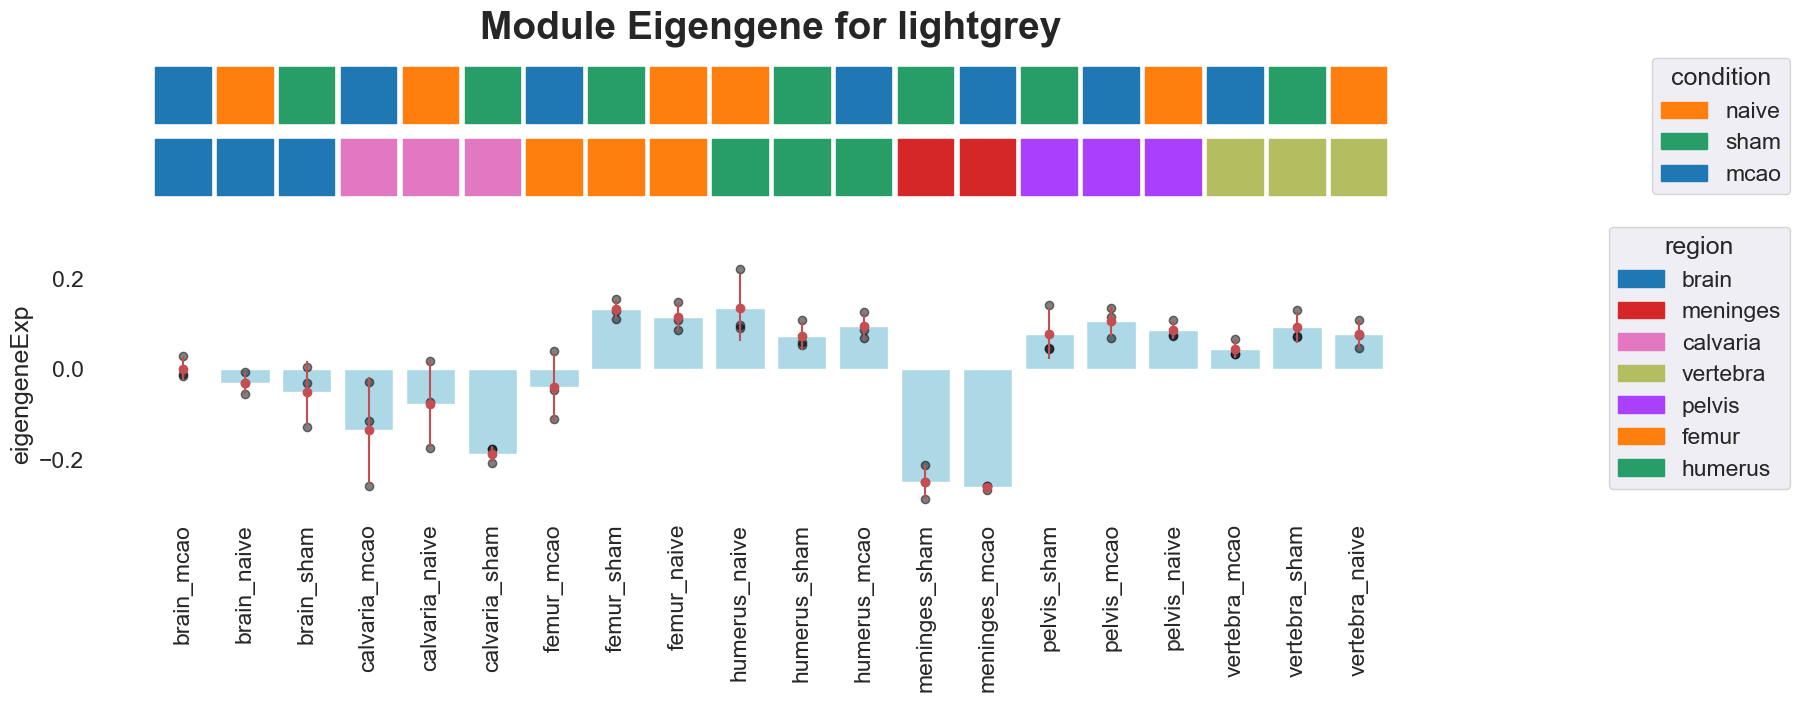

In [20]:
pyWGCNA_mouse.barplotModuleEigenGene(moduleName="lightgrey", metadata=samples_info.columns.tolist())

In [21]:
pyWGCNA_mouse.datExpr.var["gene_name"] = pyWGCNA_mouse.datExpr.var["gene"]

In [22]:
pyWGCNA_mouse.figureType = "pdf"
gene_set_library = ["GO_Biological_Process_2021", "GO_Cellular_Component_2021", "GO_Molecular_Function_2021"]
pyWGCNA_mouse.functional_enrichment_analysis(type="GO",
                                             moduleName="lightgrey",
#                                              sets=gene_set_library,
                                             p_value=0.05,
                                             file_name="GO_lightgrey_mouse")

In [23]:
pyWGCNA_mouse.figureType = "pdf"
gene_set_library = ["GO_Biological_Process_2021", "GO_Cellular_Component_2021", "GO_Molecular_Function_2021"]
pyWGCNA_mouse.functional_enrichment_analysis(type="GO",
                                             moduleName="gainsboro",
#                                              sets=gene_set_library,
                                             p_value=0.05,
                                             file_name="GO_gainsboro_mouse")

In [24]:
pyWGCNA_mouse.figureType = "pdf"
gene_set_library = ["GO_Biological_Process_2021", "GO_Cellular_Component_2021", "GO_Molecular_Function_2021"]
pyWGCNA_mouse.functional_enrichment_analysis(type="GO",
                                             moduleName="dimgrey",
#                                              sets=gene_set_library,
                                             p_value=0.05,
                                             file_name="GO_dimgrey_mouse")

In [114]:
lightgrey_GO = pd.read_csv("figures/GO/GO_lightgrey_mouse/GO_Biological_Process_2021.mus musculus.enrichr.reports.txt",
                          delimiter='\t')


gainsboro_GO = pd.read_csv("figures/GO/GO_gainsboro_mouse/GO_Biological_Process_2021.mus musculus.enrichr.reports.txt",
                          delimiter='\t')


dimgrey_GO = pd.read_csv("figures/GO/GO_dimgrey_mouse/GO_Biological_Process_2021.mus musculus.enrichr.reports.txt",
                          delimiter='\t')

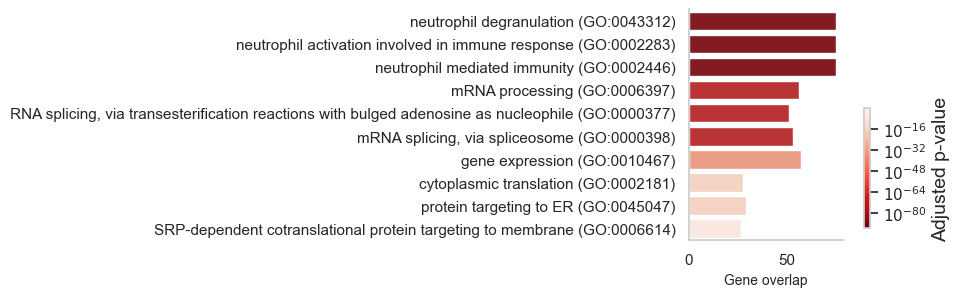

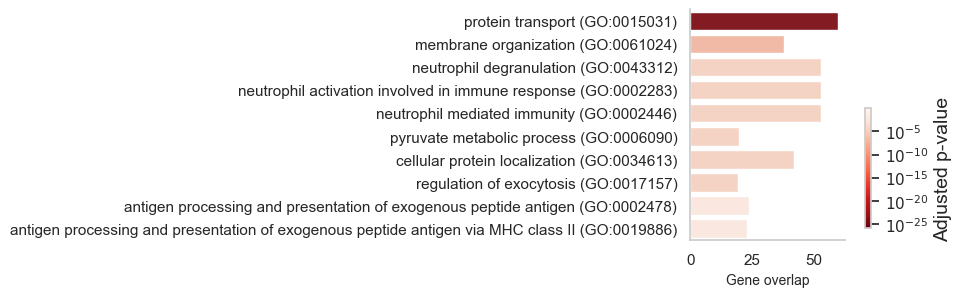

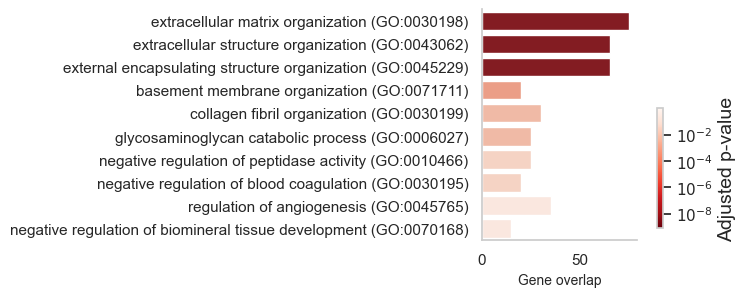

In [115]:
plot_gene_enrichment(lightgrey_GO, plot=True, save="figures/mouse/modules/GO_lightgrey.pdf")
plot_gene_enrichment(dimgrey_GO, plot=True, save="figures/mouse/modules/GO_dimgrey.pdf")
plot_gene_enrichment(gainsboro_GO, plot=True, save="figures/mouse/modules/GO_lgainsboro.pdf")